# [YOLOv5](https://github.com/ultralytics/yolov5)
![](https://user-images.githubusercontent.com/26833433/98699617-a1595a00-2377-11eb-8145-fc674eb9b1a7.jpg)
![](https://user-images.githubusercontent.com/26833433/90187293-6773ba00-dd6e-11ea-8f90-cd94afc0427f.png)

### 21 Classes Map:
```
{
 'ambulance': 0,
 'army vehicle': 1,
 'auto rickshaw': 2,
 'bicycle': 3,
 'bus': 4,
 'car': 5,
 'garbagevan': 6,
 'human hauler': 7,
 'minibus': 8,
 'minivan': 9,
 'motorbike': 10,
 'pickup': 11,
 'policecar': 12,
 'rickshaw': 13,
 'scooter': 14,
 'suv': 15,
 'taxi': 16,
 'three wheelers (CNG)': 17,
 'truck': 18,
 'van': 19,
 'wheelbarrow': 20
}
```

### Class Images:

![](https://dhaka-ai.com/static/images/dataset-top.jpg)
![](https://dhaka-ai.com/static/images/dataset-bottom.jpg)

# Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import cv2, os, shutil

# Fix Dataset for Kaggle
* Dataset is already in` YOLOv5` format
* We need to copy the dataset to current directory for `write access` otherwise we'll get error
* For Colab we don't need to run the following cell

In [2]:
shutil.copytree('/kaggle/input/dhakaai-3-fold-cv-yolo-dataset/dhakaai', '/kaggle/working/dhakaai')

'/kaggle/working/dhakaai'

# Clone YOLOv5 [Repo](https://github.com/ultralytics/yolov5)

In [3]:
os.chdir('/kaggle/working')

In [4]:
# !git clone https://github.com/ultralytics/yolov5  # clone repo
!git clone https://github.com/navidnayyem/yolov5.git
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
os.chdir('/kaggle/working/yolov5')

import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


# Data Config File
The Dataset has been rearanged for 3 Fold Cross Validation. Folds were created by considering annotator
For more details go to this [link](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data)


In [5]:
from os import listdir
from os.path import isfile, join
import yaml

def format_dataset_config(val_fold = 0,
                cwd   = '/kaggle/working',
                folds = [0, 1, 2]):
    
    path = join(cwd, 'dhakaai/images/')
    ## processing
    train_files = []
    val_files   = []
    test_files  = []
    for fold in folds:
        mypath = path + 'fold' + str(fold);
        if fold == val_fold:       
            val_files = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f))]
        else:
            onefoldfiles = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f))]
            train_files += onefoldfiles
    # test
    mypath = path + 'test';
    test_files += [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f))]

    print('\nTotal Dataset:')
    print(f'  train: {len(train_files)}')
    print(f'  val: {len(val_files)}')
    print(f'  test: {len(test_files)}')
    
    with open(join( cwd , 'train.txt'), 'w') as f:
        for path in train_files:
            f.write(path+'\n')

    with open(join( cwd , 'val.txt'), 'w') as f:
        for path in val_files:
            f.write(path+'\n')
            
    data = dict(
        train =  join( cwd , 'train.txt/') ,
        val   =  join( cwd , 'val.txt/' ),
        nc    = 21,
        names = open(join( cwd , 'dhakaai/classes.txt'), 'r').read().split('\n')
        )

    with open(join( cwd , 'dhakaai.yaml'), 'w') as outfile:
        yaml.dump(data, outfile, default_flow_style=False)
        
    f = open(join( cwd , 'dhakaai.yaml'), 'r')
    print('\nyaml:')
    print(f.read())

## Pretrained Checkpoints:

| Model | AP<sup>val</sup> | AP<sup>test</sup> | AP<sub>50</sub> | Speed<sub>GPU</sub> | FPS<sub>GPU</sub> || params | FLOPS |
|---------- |------ |------ |------ | -------- | ------| ------ |------  |  :------: |
| [YOLOv5s](https://github.com/ultralytics/yolov5/releases/tag/v3.0)    | 37.0     | 37.0     | 56.2     | **2.4ms** | **416** || 7.5M   | 13.2B
| [YOLOv5m](https://github.com/ultralytics/yolov5/releases/tag/v3.0)    | 44.3     | 44.3     | 63.2     | 3.4ms     | 294     || 21.8M  | 39.4B
| [YOLOv5l](https://github.com/ultralytics/yolov5/releases/tag/v3.0)    | 47.7     | 47.7     | 66.5     | 4.4ms     | 227     || 47.8M  | 88.1B
| [YOLOv5x](https://github.com/ultralytics/yolov5/releases/tag/v3.0)    | **49.2** | **49.2** | **67.7** | 6.9ms     | 145     || 89.0M  | 166.4B
| | | | | | || |
| [YOLOv5x](https://github.com/ultralytics/yolov5/releases/tag/v3.0) + TTA|**50.8**| **50.8** | **68.9** | 25.5ms    | 39      || 89.0M  | 354.3B
| | | | | | || |
| [YOLOv3-SPP](https://github.com/ultralytics/yolov5/releases/tag/v3.0) | 45.6     | 45.5     | 65.2     | 4.5ms     | 222     || 63.0M  | 118.0B

# Selecting Models
In this notebok I'm using `v5s`. To select your prefered model just replace `--cfg models/yolov5s.yaml --weights yolov5s.pt` with the following command:
* `v5s` : `--cfg models/yolov5s.yaml --weights yolov5s.pt`
* `v5m` : `--cfg models/yolov5m.yaml --weights yolov5m.pt`
* `v5l` : `--cfg models/yolov5l.yaml --weights yolov5l.pt`
* `v5x` : `--cfg models/yolov5x.yaml --weights yolov5x.pt`

# Augmentation

In [6]:
hyp = """
lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.2  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4  # image HSV-Value augmentation (fraction)
degrees: 0.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.5  # image scale (+/- gain)
shear: 0.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 1.0  # image mosaic (probability)
mixup: 0.0  # image mixup (probability)
"""
with open('/kaggle/working/hyp.yaml', 'w') as f:
    yaml.dump(yaml.load(hyp, Loader = yaml.FullLoader), f)

# Training
Before we start please keep these points on mind,
1. After each run a new `exp` will be created on `yolov5/runs`. So, make sure you're selecting the correct one
2. If you've performed experimented `3` then weights of that experiment will be in `yolov5/runs/exp3/weights/`
3. GPU Notebook runtime is `9 hours` so choose your `model` and `img-size` accordingly
4. If you're planning to train `v5x` on large `img-size` then you should train each fold seperately in seprate notebooks for `runtime` limitation
3. If you're having unusual issues you may look [here](https://github.com/ultralytics/yolov5/issues)

## Parameters:
* `--epochs` : number of epochs
* `--img-size` : image_size
* `--batch-size` : batch_size
* `--cfg` : config of model # you may customize it for custom model
* `--weights` : weights for the model , default value like `yolov5x.pt`will automatically be downloaded
* `--data`: config of dataset
* `--cache`: load all images into the memory, will speed up the training
* `--hyp` : hyperparameters like augmentation

## Fold 0

In [7]:
fold = 0
format_dataset_config(val_fold = fold)

# training
!python train.py --epochs 100\
--img-size 640\
--batch-size 16\
--cfg models/yolov5s.yaml\
--weights yolov5s.pt\
--data /kaggle/working/dhakaai.yaml\
--cache\
--hyp '/kaggle/working/hyp.yaml' 


Total Dataset:
  train: 2082
  val: 918
  test: 498

yaml:
names:
- ambulance
- army vehicle
- auto rickshaw
- bicycle
- bus
- car
- garbagevan
- human hauler
- minibus
- minivan
- motorbike
- pickup
- policecar
- rickshaw
- scooter
- suv
- taxi
- three wheelers (CNG)
- truck
- van
- wheelbarrow
nc: 21
train: /kaggle/working/train.txt/
val: /kaggle/working/val.txt/

Using torch 1.7.0 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='models/yolov5s.yaml', data='/kaggle/working/dhakaai.yaml', device='', epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='/kaggle/working/hyp.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboa

## Train Batch Images

In [8]:
glob('runs/train/**/*')

['runs/train/exp/train_batch0.jpg',
 'runs/train/exp/test_batch0_pred.jpg',
 'runs/train/exp/labels_correlogram.png',
 'runs/train/exp/test_batch2_pred.jpg',
 'runs/train/exp/test_batch0_labels.jpg',
 'runs/train/exp/test_batch1_pred.jpg',
 'runs/train/exp/results.png',
 'runs/train/exp/hyp.yaml',
 'runs/train/exp/precision_recall_curve.png',
 'runs/train/exp/labels.png',
 'runs/train/exp/weights',
 'runs/train/exp/train_batch1.jpg',
 'runs/train/exp/test_batch1_labels.jpg',
 'runs/train/exp/results.txt',
 'runs/train/exp/opt.yaml',
 'runs/train/exp/events.out.tfevents.1614887139.6e32107d7879.75.0',
 'runs/train/exp/train_batch2.jpg',
 'runs/train/exp/test_batch2_labels.jpg']

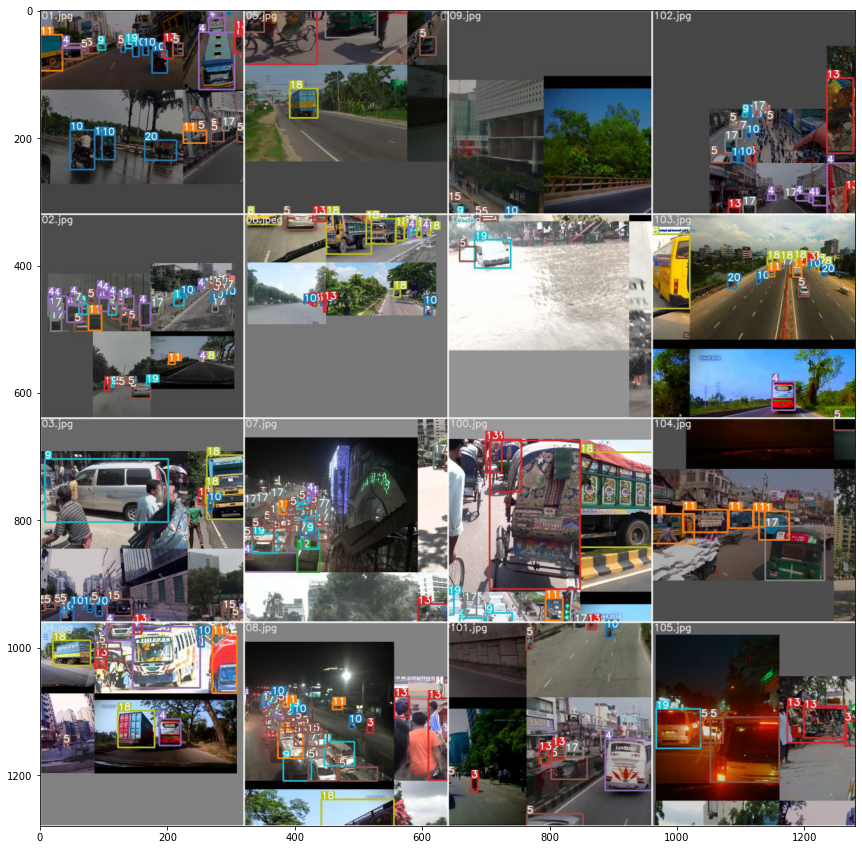

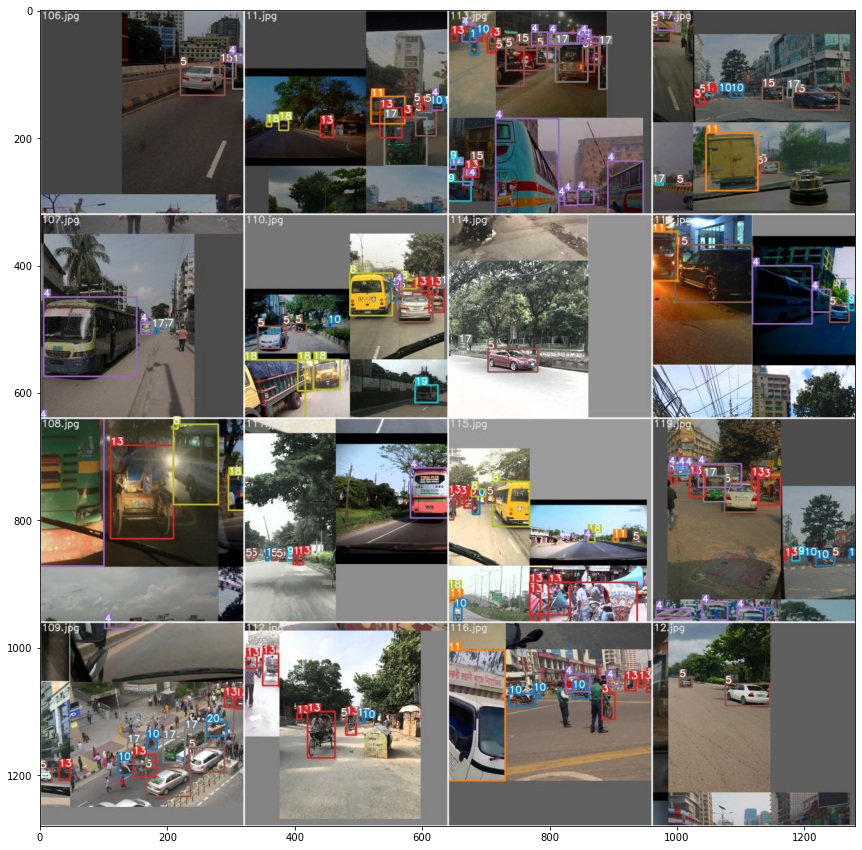

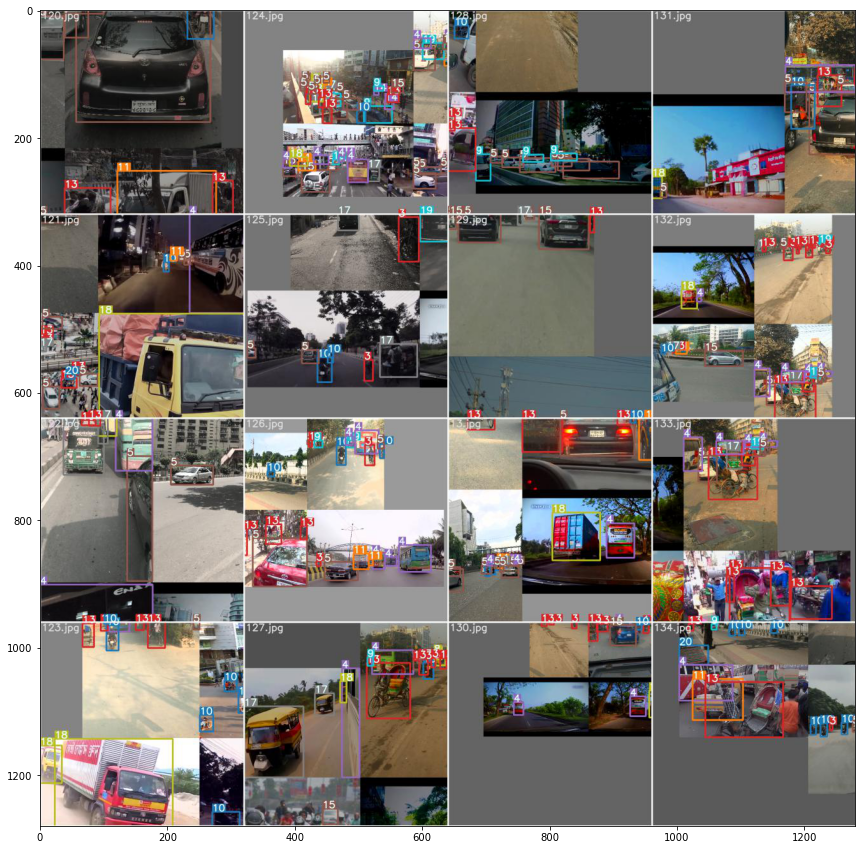

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
plt.imshow(plt.imread('runs/train/exp/train_batch0.jpg'))

plt.figure(figsize = (15, 15))
plt.imshow(plt.imread('runs/train/exp/train_batch1.jpg'))

plt.figure(figsize = (15, 15))
plt.imshow(plt.imread('runs/train/exp/train_batch2.jpg'))

## Ground Truth and Predictions

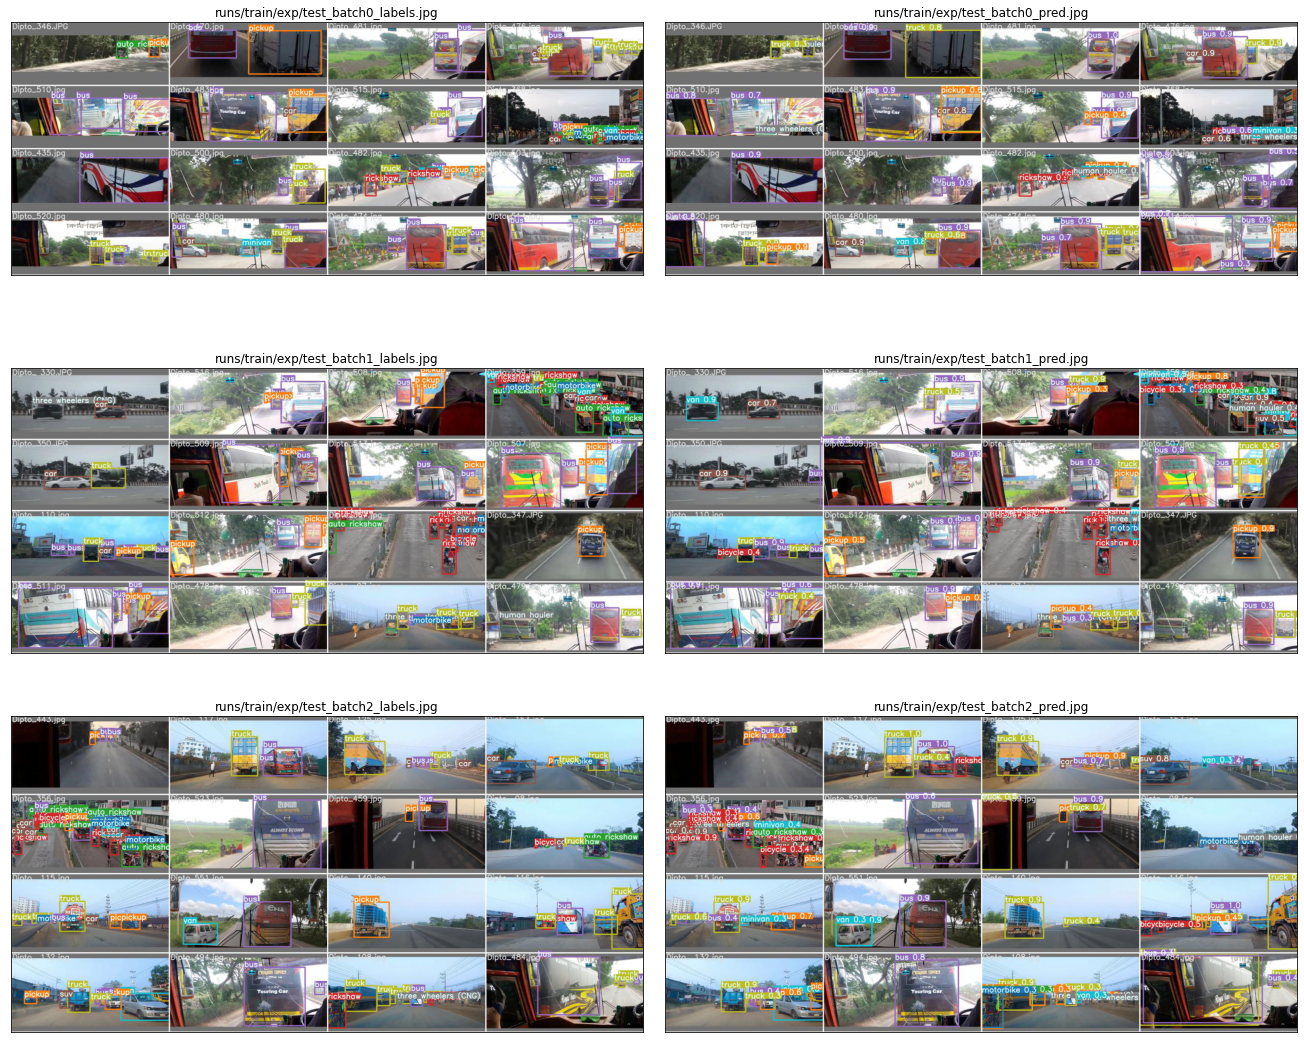

In [10]:
fig, ax = plt.subplots(3, 2, figsize = (2*5*1.8,3*2.5*2), constrained_layout = True)
for row in range(3):
    ax[row][0].imshow(plt.imread(f'runs/train/exp/test_batch{row}_labels.jpg'))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(f'runs/train/exp/test_batch{row}_labels.jpg', fontsize = 12)
    
    ax[row][1].imshow(plt.imread(f'runs/train/exp/test_batch{row}_pred.jpg'))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f'runs/train/exp/test_batch{row}_pred.jpg', fontsize = 12)

In [11]:
!zip /kaggle/working/output.zip -r /kaggle/working/yolov5

  adding: kaggle/working/yolov5/ (stored 0%)
  adding: kaggle/working/yolov5/data/ (stored 0%)
  adding: kaggle/working/yolov5/data/hyp.scratch.yaml (deflated 54%)
  adding: kaggle/working/yolov5/data/scripts/ (stored 0%)
  adding: kaggle/working/yolov5/data/scripts/get_coco.sh (deflated 54%)
  adding: kaggle/working/yolov5/data/scripts/get_voc.sh (deflated 63%)
  adding: kaggle/working/yolov5/data/voc.yaml (deflated 43%)
  adding: kaggle/working/yolov5/data/coco.yaml (deflated 49%)
  adding: kaggle/working/yolov5/data/coco128.yaml (deflated 51%)
  adding: kaggle/working/yolov5/data/hyp.finetune.yaml (deflated 45%)
  adding: kaggle/working/yolov5/data/images/ (stored 0%)
  adding: kaggle/working/yolov5/data/images/zidane.jpg (deflated 0%)
  adding: kaggle/working/yolov5/data/images/bus.jpg (deflated 1%)
  adding: kaggle/working/yolov5/.github/ (stored 0%)
  adding: kaggle/working/yolov5/.github/ISSUE_TEMPLATE/ (stored 0%)
  adding: kaggle/working/yolov5/.github/ISSUE_TEMPLATE/bug-repor

In [12]:
ls

Dockerfile  __pycache__/  models/           train.py        yolov5s.pt
LICENSE     data/         requirements.txt  tutorial.ipynb
LICENSE.md  detect.py     runs/             utils/
README.md   hubconf.py    test.py           weights/


In [13]:
cd ..

/kaggle/working


In [14]:
from IPython.display import FileLink
FileLink('output.zip')

/kaggle/working/output.zip